In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
import matplotlib
font_location='c:/Windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [4]:
import sys
!{sys.executable} -m pip install yellowbrick

In [5]:
# Elbow Method
from yellowbrick.cluster import KElbowVisualizer

# Data

In [6]:
df = pd.read_excel('전라북도/시군구_변수2.xlsx')
df.head().T

,0,1,2,3,4
시군구,목포시,여수시,순천시,나주시,광양시
재정자립도,17.3,29.3,17.8,16.8,25.3
노인인구비율,18.403979,20.934653,16.826932,23.29647,14.324758
기초생활수급자비율,1.52897,0.7421,0.546513,0.679426,0.775685
10만명당 약국수,58.646693,49.157764,47.273704,50.935398,35.648506
10만명당 안전상비의약품점포수,117.755171,73.918711,72.343092,96.690926,38.949293
총인구수,216551,274626,279225,115833,151479
기초생활수급자,3311,2038,1526,787,1175
안전상비의약품,255,203,202,112,59
자동차,102292,143418,153944,75025,93385


In [7]:
df_ = df[['재정자립도','노인인구비율','기초생활수급자비율','10만명당 약국수','10만명당 안전상비의약품점포수','10만면당 자동차수']]
df_.head().T

,0,1,2,3,4
재정자립도,17.300000,29.300000,17.800000,16.800000,25.300000
노인인구비율,18.403979,20.934653,16.826932,23.296470,14.324758
기초생활수급자비율,1.528970,0.742100,0.546513,0.679426,0.775685
10만명당 약국수,58.646693,49.157764,47.273704,50.935398,35.648506
10만명당 안전상비의약품점포수,117.755171,73.918711,72.343092,96.690926,38.949293
10만면당 자동차수,47236.909550,52223.023312,55132.599158,64769.970561,61648.809406


In [8]:
city = ['목포시','여수시','순천시','나주시','광양시',
        '담양군','곡성군','구례군','고흥군','보성군',
        '화순군','장흥군','강진군','해남군','영암군',
        '무안군','함평군','영광군','장성군','완도군',
        '진도군','신안군']

df_minmax3 = df_.copy()
df_minmax4 = df_.copy()
df_standard3 = df_.copy()
df_standard4 = df_.copy()
df_standard5 = df_.copy()

# Scaling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# from sklearn.datasets import load_breast_cancer

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Minmax

C:\Users\JIHYE\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

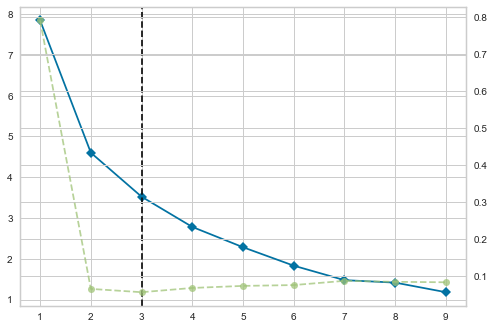

In [10]:
# 정규화
scaler_minmax = MinMaxScaler()
data_scale_minmax = scaler_minmax.fit_transform(df_)

from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(data_scale_minmax)

In [11]:
# Minmax 군집 3개
from sklearn.cluster import KMeans
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale_minmax)
df_minmax3['cluster'] = model.fit_predict(data_scale_minmax)

In [12]:
# Minmax 군집 4개
from sklearn.cluster import KMeans
k = 4
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale_minmax)
df_minmax4['cluster'] = model.fit_predict(data_scale_minmax)

## Standard

C:\Users\JIHYE\miniconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

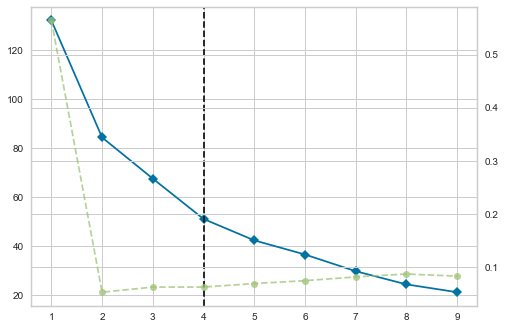

In [13]:
# 정규화
scaler_stand = StandardScaler()
data_scale_stand = scaler_stand.fit_transform(df_)

from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(data_scale_stand)

In [14]:
# Scaling 군집3개
from sklearn.cluster import KMeans
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale_stand)
df_standard3['cluster'] = model.fit_predict(data_scale_stand)

In [15]:
# Scaling 군집 4개
from sklearn.cluster import KMeans
k = 4
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale_stand)
df_standard4['cluster'] = model.fit_predict(data_scale_stand)

In [16]:
# Scaling 군집 5개
from sklearn.cluster import KMeans
k = 5
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale_stand)
df_standard5['cluster'] = model.fit_predict(data_scale_stand)

# 그래프

In [17]:
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

In [18]:
df_minmax3['시군구'] = city
df_minmax4['시군구'] = city
df_standard3['시군구'] = city
df_standard4['시군구'] = city
df_standard5['시군구'] = city

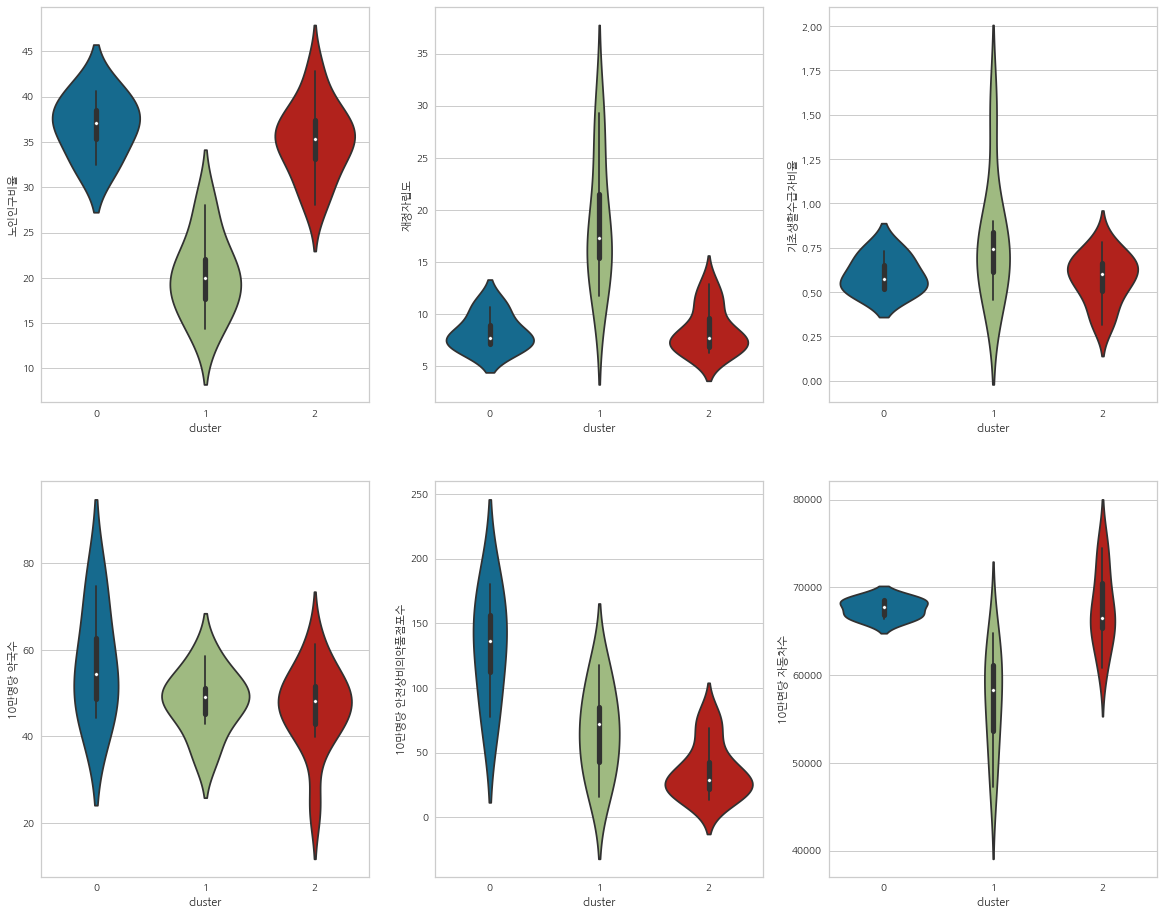

In [19]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,16))

for i in (df_minmax3,df_minmax4,df_standard3,df_standard4,df_standard5):
    sns.violinplot(x='cluster',y='노인인구비율',data=i,ax=ax[0,0])
    sns.violinplot(x='cluster',y='재정자립도',data=i,ax=ax[0,1])
    sns.violinplot(x='cluster',y='기초생활수급자비율',data=i,ax=ax[0,2])
    sns.violinplot(x='cluster',y='10만명당 약국수',data=i,ax=ax[1,0])
    sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=i,ax=ax[1,1])
    sns.violinplot(x='cluster',y='10만면당 자동차수',data=i,ax=ax[1,2])
    
    plt.show()

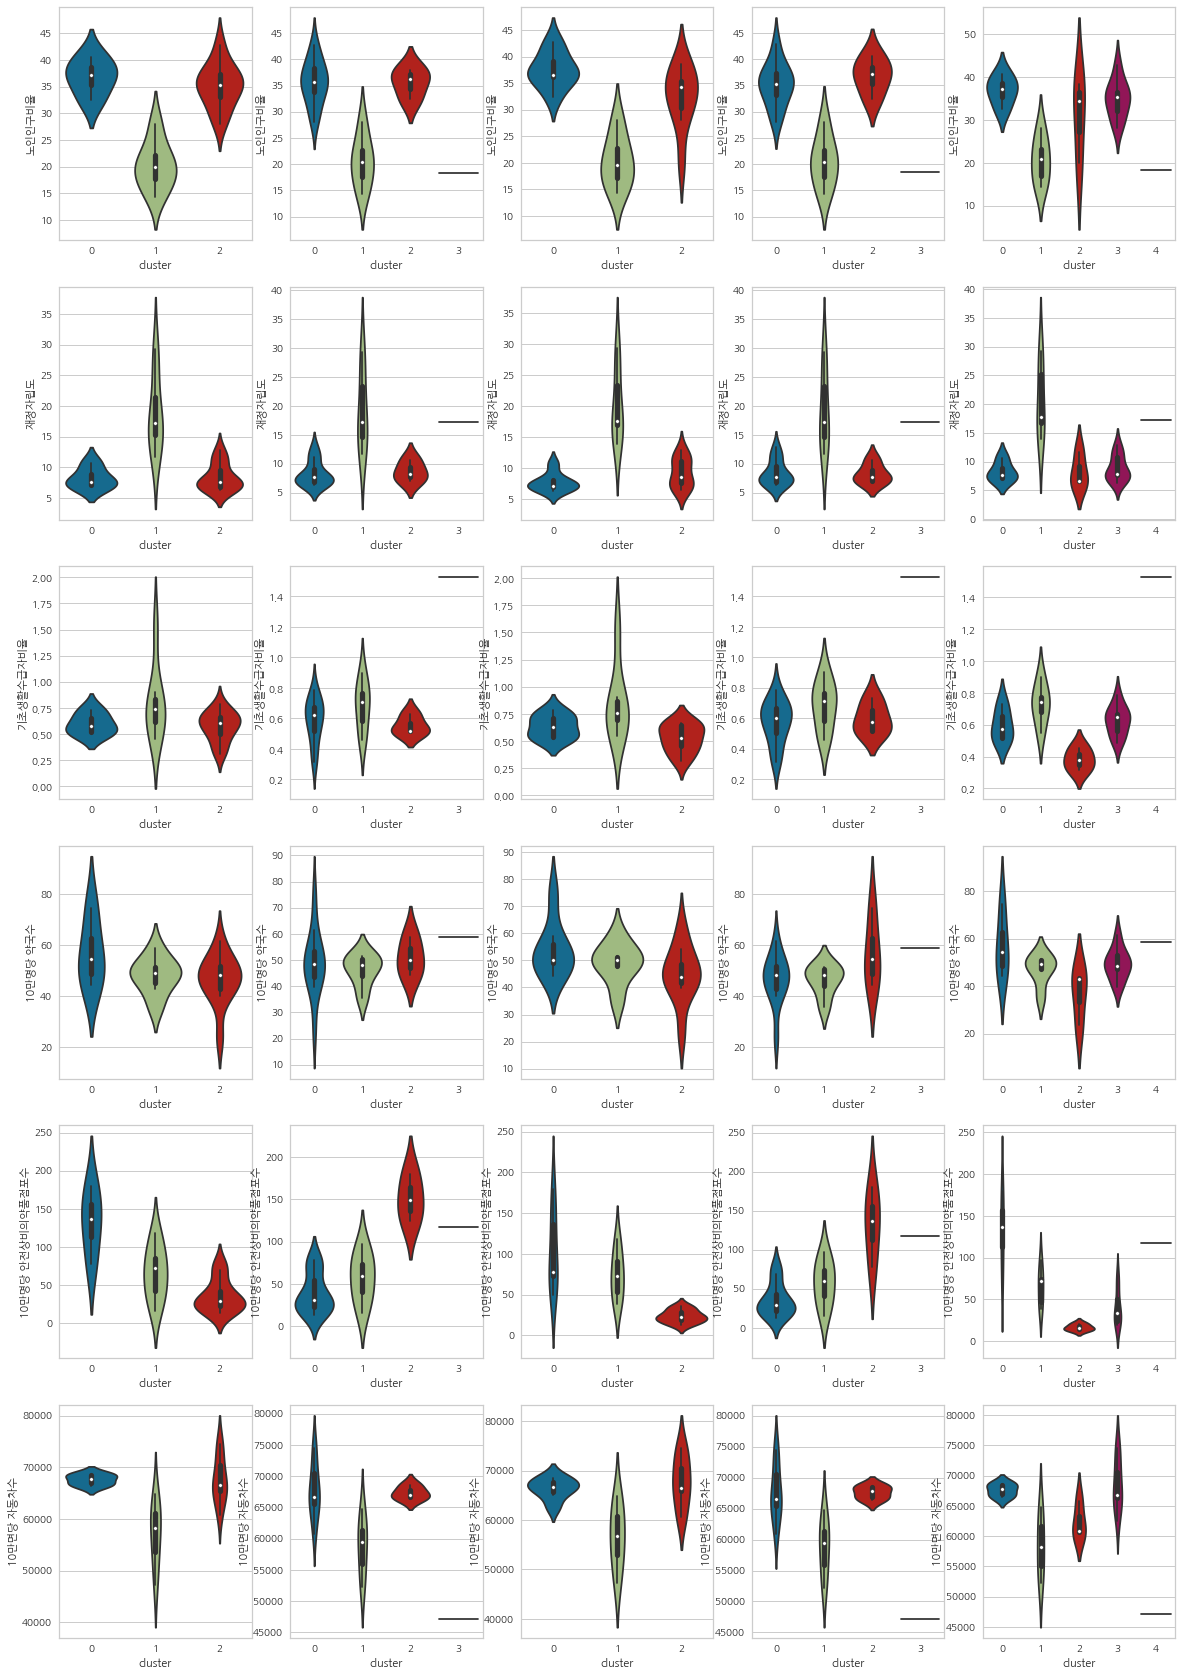

In [37]:
fig, ax = plt.subplots(ncols=5, nrows=6, figsize=(20,30))

sns.violinplot(x='cluster',y='노인인구비율',data=df_minmax3,ax=ax[0,0])
sns.violinplot(x='cluster',y='노인인구비율',data=df_minmax4,ax=ax[0,1])
sns.violinplot(x='cluster',y='노인인구비율',data=df_standard3,ax=ax[0,2])
sns.violinplot(x='cluster',y='노인인구비율',data=df_standard4,ax=ax[0,3])
sns.violinplot(x='cluster',y='노인인구비율',data=df_standard5,ax=ax[0,4])
sns.violinplot(x='cluster',y='재정자립도',data=df_minmax3,ax=ax[1,0])
sns.violinplot(x='cluster',y='재정자립도',data=df_minmax4,ax=ax[1,1])
sns.violinplot(x='cluster',y='재정자립도',data=df_standard3,ax=ax[1,2])
sns.violinplot(x='cluster',y='재정자립도',data=df_standard4,ax=ax[1,3])
sns.violinplot(x='cluster',y='재정자립도',data=df_standard5,ax=ax[1,4])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_minmax3,ax=ax[2,0])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_minmax4,ax=ax[2,1])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_standard3,ax=ax[2,2])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_standard4,ax=ax[2,3])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_standard5,ax=ax[2,4])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_minmax3,ax=ax[3,0])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_minmax4,ax=ax[3,1])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_standard3,ax=ax[3,2])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_standard4,ax=ax[3,3])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_standard5,ax=ax[3,4])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_minmax3,ax=ax[4,0])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_minmax4,ax=ax[4,1])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_standard3,ax=ax[4,2])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_standard4,ax=ax[4,3])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_standard5,ax=ax[4,4])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_minmax3,ax=ax[5,0])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_minmax4,ax=ax[5,1])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_standard3,ax=ax[5,2])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_standard4,ax=ax[5,3])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_standard5,ax=ax[5,4])

plt.show()

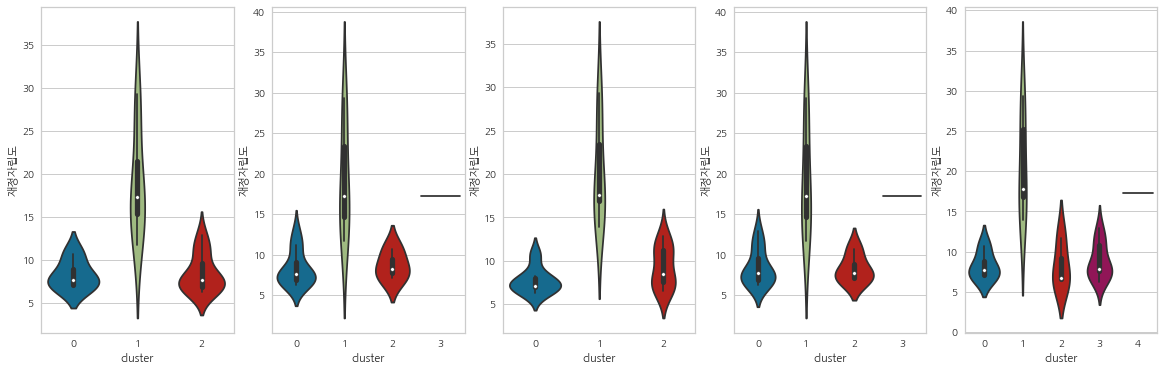

In [23]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,6))

sns.violinplot(x='cluster',y='재정자립도',data=df_minmax3,ax=ax[0])
sns.violinplot(x='cluster',y='재정자립도',data=df_minmax4,ax=ax[1])
sns.violinplot(x='cluster',y='재정자립도',data=df_standard3,ax=ax[2])
sns.violinplot(x='cluster',y='재정자립도',data=df_standard4,ax=ax[3])
sns.violinplot(x='cluster',y='재정자립도',data=df_standard5,ax=ax[4])
    
plt.show()

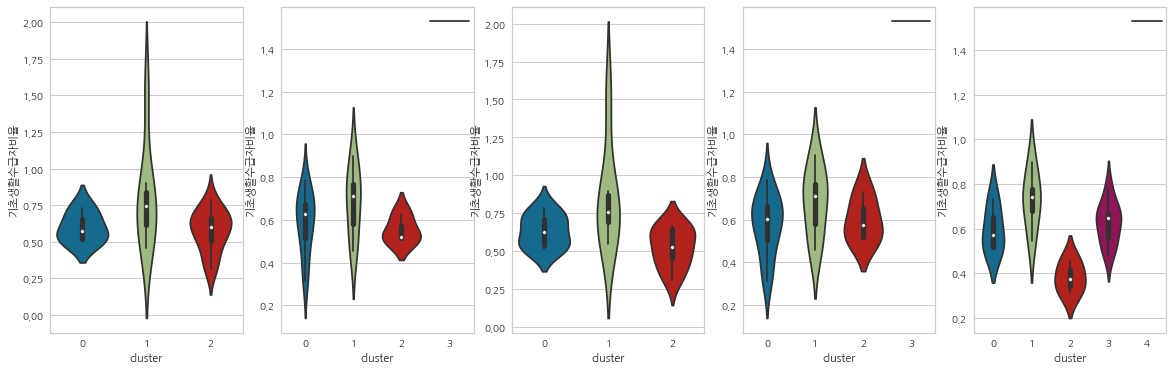

In [24]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,6))

sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_minmax3,ax=ax[0])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_minmax4,ax=ax[1])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_standard3,ax=ax[2])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_standard4,ax=ax[3])
sns.violinplot(x='cluster',y='기초생활수급자비율',data=df_standard5,ax=ax[4])
    
plt.show()

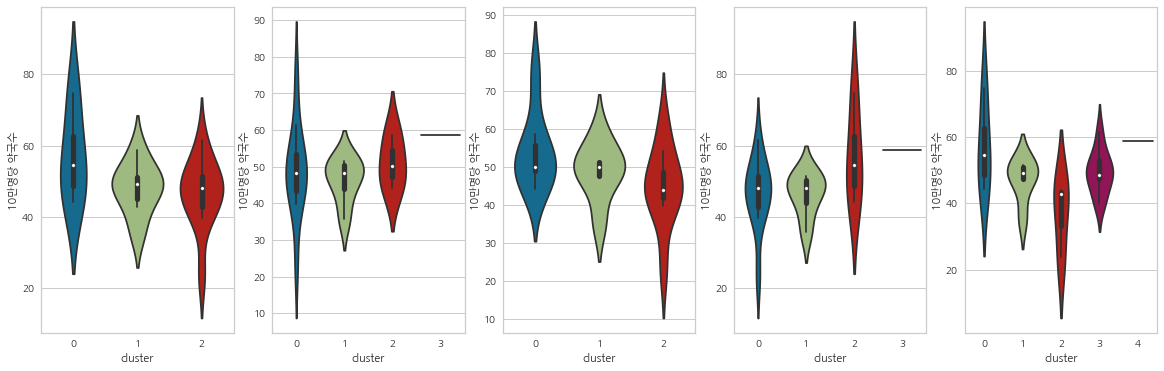

In [25]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,6))

sns.violinplot(x='cluster',y='10만명당 약국수',data=df_minmax3,ax=ax[0])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_minmax4,ax=ax[1])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_standard3,ax=ax[2])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_standard4,ax=ax[3])
sns.violinplot(x='cluster',y='10만명당 약국수',data=df_standard5,ax=ax[4])
    
plt.show()

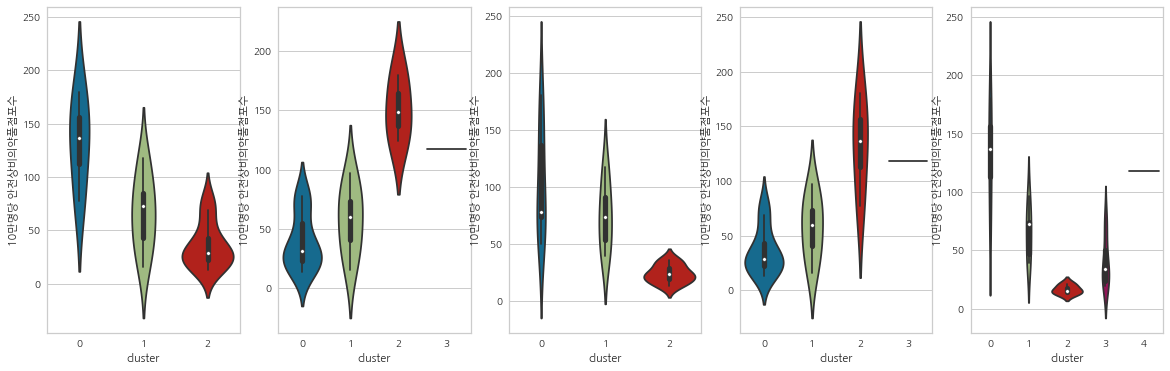

In [26]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20,6))

sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_minmax3,ax=ax[0])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_minmax4,ax=ax[1])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_standard3,ax=ax[2])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_standard4,ax=ax[3])
sns.violinplot(x='cluster',y='10만명당 안전상비의약품점포수',data=df_standard5,ax=ax[4])
    
plt.show()

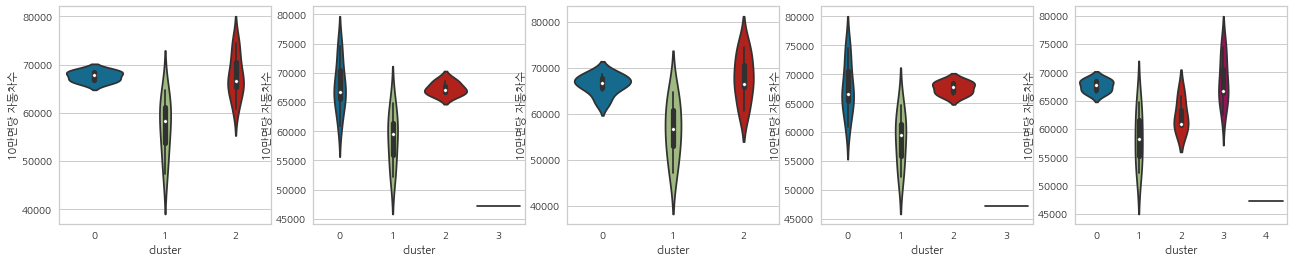

In [29]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(22,6))

sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_minmax3,ax=ax[0])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_minmax4,ax=ax[1])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_standard3,ax=ax[2])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_standard4,ax=ax[3])
sns.violinplot(x='cluster',y='10만면당 자동차수',data=df_standard5,ax=ax[4])
    
plt.show()

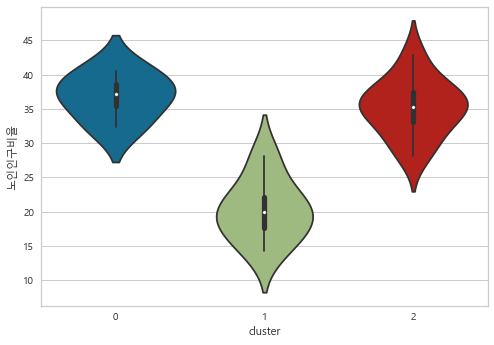

In [88]:
sns.violinplot(x='cluster',y='노인인구비율',data=df)

plt.show()

In [54]:
import folium

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수,cluster
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,11.736364,30.734363,0.651772,48.901188,63.056108,64284.360159,1.318182
std,6.225795,8.334377,0.240521,10.021058,46.255684,6707.545121,0.779888
min,6.300000,14.324758,0.313306,23.695435,13.164130,47236.909550,0.000000
25%,7.225000,24.487150,0.520277,43.964218,24.874895,61029.143144,1.000000
50%,9.600000,33.375342,0.637783,48.891641,48.270522,66078.092735,1.500000
75%,13.650000,36.484988,0.722845,52.698563,77.714807,68138.485687,2.000000
max,29.300000,42.827717,1.528970,74.684522,180.074235,74536.141150,2.000000


In [43]:
df_minmax3[['시군구','cluster']].sort_values('cluster')

,시군구,cluster
9,보성군,0
7,구례군,0
6,곡성군,0
5,담양군,0
0,목포시,1
15,무안군,1
10,화순군,1
3,나주시,1
2,순천시,1
1,여수시,1


In [42]:
df_standard4[['시군구','cluster']].sort_values('cluster')

,시군구,cluster
21,신안군,0
19,완도군,0
18,장성군,0
17,영광군,0
16,함평군,0
14,영암군,0
13,해남군,0
8,고흥군,0
12,강진군,0
20,진도군,0


In [32]:
df_minmax4[['시군구','cluster']]
df_standard3[['시군구','cluster']]
df_standard4[['시군구','cluster']]
df_standard5[['시군구','cluster']]

,시군구,cluster
0,목포시,4
1,여수시,1
2,순천시,1
3,나주시,1
4,광양시,1
5,담양군,0
6,곡성군,0
7,구례군,0
8,고흥군,3
9,보성군,0


In [56]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

C:\Users\JIHYE\AppData\Local\Temp\ipykernel_9368\2467297107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = model.fit_predict(data_scale)


In [75]:
df

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수,시군구,cluster
0,17.3,18.403979,1.528970,58.646693,117.755171,47236.909550,목포시,3
1,29.3,20.934653,0.742100,49.157764,73.918711,52223.023312,여수시,1
2,17.8,16.826932,0.546513,47.273704,72.343092,55132.599158,순천시,1
3,16.8,23.296470,0.679426,50.935398,96.690926,64769.970561,나주시,1
4,25.3,14.324758,0.775685,35.648506,38.949293,61648.809406,광양시,1
5,10.7,32.426017,0.518259,50.083836,124.120811,68549.528559,담양군,2
6,8.3,37.925839,0.514498,58.799750,180.074235,67042.740068,곡성군,2
7,7.1,36.338436,0.626733,44.192680,148.648106,66409.545619,구례군,2
8,6.3,42.827717,0.560008,53.104181,49.885746,62527.759004,고흥군,0
9,7.0,40.589750,0.731393,74.684522,77.259851,68503.734226,보성군,0


In [58]:
df['시군구'] = df_['시군구']
df

C:\Users\JIHYE\AppData\Local\Temp\ipykernel_9368\3659612646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['시군구'] = df_['시군구']


,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,10만면당 자동차수,시군구,cluster
0,17.3,18.403979,1.528970,58.646693,117.755171,47236.909550,목포시,3
1,29.3,20.934653,0.742100,49.157764,73.918711,52223.023312,여수시,1
2,17.8,16.826932,0.546513,47.273704,72.343092,55132.599158,순천시,1
3,16.8,23.296470,0.679426,50.935398,96.690926,64769.970561,나주시,1
4,25.3,14.324758,0.775685,35.648506,38.949293,61648.809406,광양시,1
5,10.7,32.426017,0.518259,50.083836,124.120811,68549.528559,담양군,2
6,8.3,37.925839,0.514498,58.799750,180.074235,67042.740068,곡성군,2
7,7.1,36.338436,0.626733,44.192680,148.648106,66409.545619,구례군,2
8,6.3,42.827717,0.560008,53.104181,49.885746,62527.759004,고흥군,0
9,7.0,40.589750,0.731393,74.684522,77.259851,68503.734226,보성군,0


In [ ]:
from sklearn.preprocessing import RobustScaler

